## Data Exploration

In [1]:
import prediction_lib as prd
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style("dark")
%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

Dataset Directories

In [2]:
dataset_dir = "./dataset/"
order_products_train_df = pd.read_csv(dataset_dir + "order_products__train.csv") # For training
order_products_prior_df = pd.read_csv(dataset_dir + "order_products__prior.csv") # The order information for all orders before last order
orders_df = pd.read_csv(dataset_dir +"orders.csv")
products_df = pd.read_csv(dataset_dir + "products.csv")
aisles_df = pd.read_csv(dataset_dir + "aisles.csv")
departments_df = pd.read_csv(dataset_dir + "departments.csv")

In [3]:
order_products_prior_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB


In [4]:
# add_to_cart_order: The order that the user add certain product to the basket
order_products_train_df[:3]

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0


In [5]:
# order_dow: The order made on the day of the week
# order_hour_of_day: The order made on the hour of the day
# days_since_prior_order: How long between the current order and the previous order made through instacart

orders_df.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0


In [6]:
# product_name: The name of the product
products_df.head(3)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7


In [7]:
# add_to_cart_order: The order for certain product added to the final basket
#                   (from 1 to total number of items purchased in one order) 
# reordered: Wheather the user reorder it or not (True(1) for Yes, False(0) for No)
#            For prediction tasks, this is the field that needed to be determined

order_products_prior_df.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0


In [8]:
# aisle: The aisle name corresponding to the aisle id
aisles_df.head(3)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars


In [9]:
# department: The department name corresponding to the department id
departments_df.head(3)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery


### The user order frequency distribution on each day of week

From the graph, we can tell that majority of the orders are made in between Monday and Tuesday.

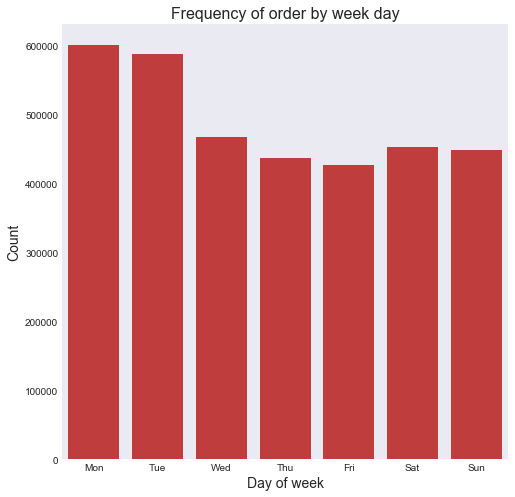

In [10]:
plt.figure(figsize=(8, 8))
sns.countplot(x="order_dow", data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=14)
plt.xlabel('Day of week', fontsize=14)
plt.xticks(rotation='horizontal')
plt.title("Frequency of order by week day", fontsize=16)
scale_ls = range(7)
index_ls = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.xticks(scale_ls,index_ls) 
plt.show()

### The user order frequency distribution on each hour of day

From the graph, we can tell that majority of the orders are made between 10 am to 4 pm of the day.

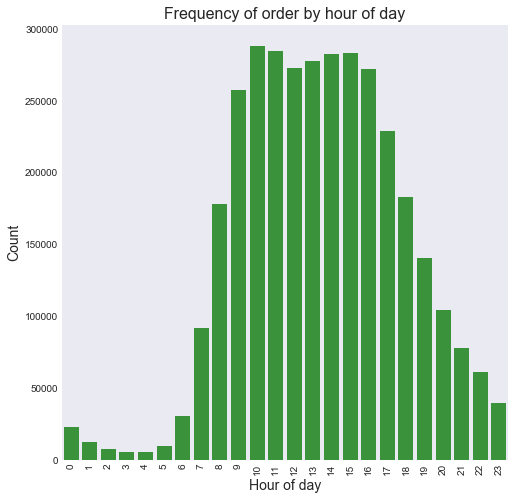

In [11]:
plt.figure(figsize=(8,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[2])
plt.ylabel('Count', fontsize=14)
plt.xlabel('Hour of day', fontsize=14)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=16)
plt.show()

### Heatmap for frequency of Day of week Vs. Hour of day
We use heapmap to demonstrate frequency that user are most likely to make purchase during hours in a week. From the heatmap, it is obvious that most of users make purchase during the noon on Monday and Tuesday. The lighter the color,, the more people make purchases during that period of time.

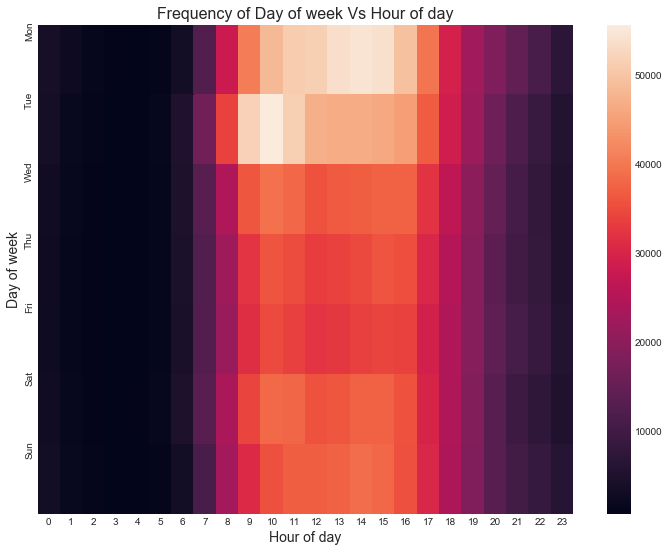

In [12]:
heatmap_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
heatmap_df = heatmap_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,9))
sns.heatmap(heatmap_df)
plt.title("Frequency of Day of week Vs Hour of day", fontsize=16)
plt.ylabel('Day of week', fontsize=14)
plt.xlabel('Hour of day', fontsize=14)
scale_ls = range(7)
index_ls = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.yticks(scale_ls,index_ls) 
plt.show()

### The frequency distribution for days since last order

The graph demonstrated the users' shopping habit using instacart. It does make sense that the most people shop through the instacart app approximately every 7 days or a month period.

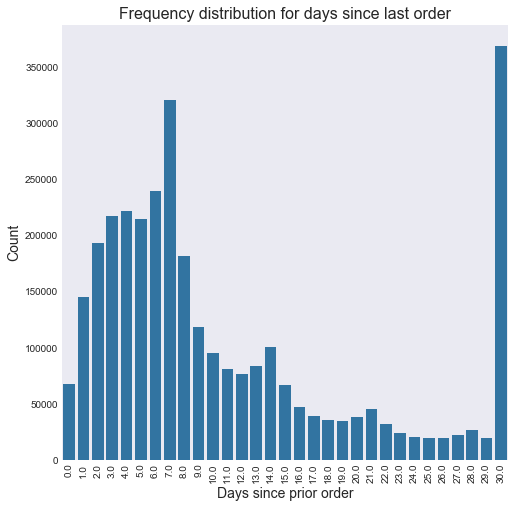

In [13]:
plt.figure(figsize=(8,8))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[0])
plt.ylabel('Count', fontsize=14)
plt.xlabel('Days since prior order', fontsize=14)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution for days since last order", fontsize=16)
plt.show()

Merge the products(products_df), aisles(aisles_df) and departments(departments_df) information into order_products_prior_df to combine as one dataframe

In [14]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


### The top-20 most ordered products

By visually inspection, most of products are fruits and the organic food take the majority of the top-20 most favored products.

In [15]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs.sort_values(by=['frequency_count'], ascending=False)

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


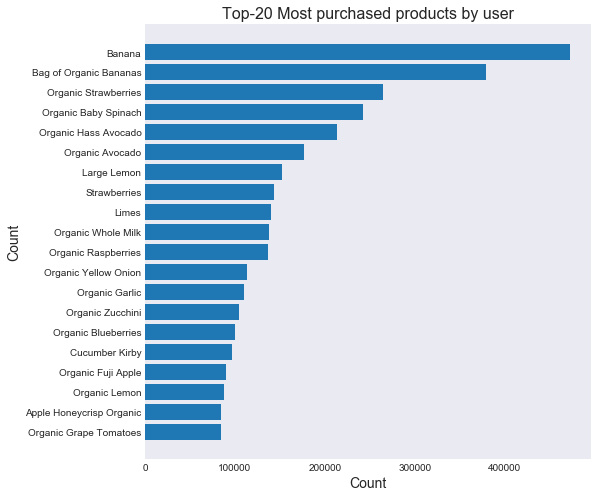

In [16]:
plt.figure(figsize=(8,8))
plt.barh(cnt_srs['product_name'], cnt_srs['frequency_count'])
plt.ylabel('Count', fontsize=14)
plt.xlabel('Count', fontsize=14)
plt.title("Top-20 Most purchased products by user", fontsize=16)
plt.gca().invert_yaxis()
plt.show()



### Aisles 


In [17]:
cnt_aisles = order_products_prior_df['aisle'].value_counts().head(20)

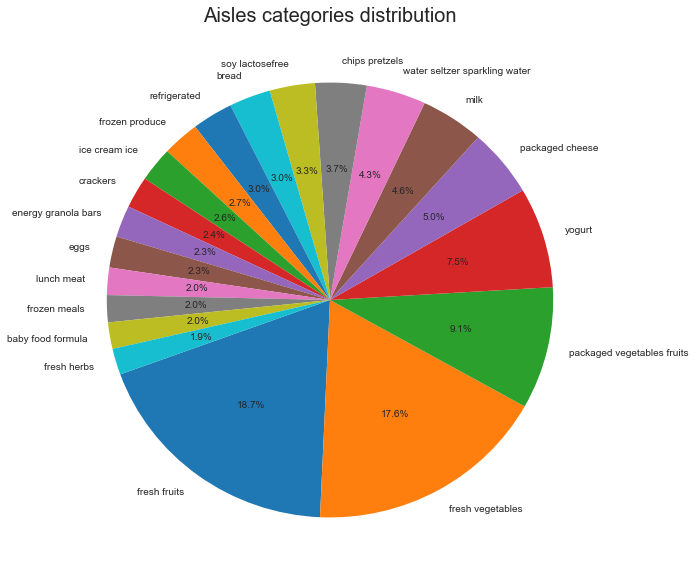

In [18]:
plt.figure(figsize=(10,10))
plt.pie(cnt_aisles.values, labels=cnt_aisles.index, 
        autopct='%1.1f%%', startangle=200)
plt.title("Aisles categories distribution", fontsize=20)
plt.show()

# plt.figure(figsize=(8,8))
# plt.barh(, , alpha=0.8, color=color[2])
# plt.ylabel('Aisles', fontsize=14)
# plt.title("Frequency distribution for ", fontsize=16)
# plt.xlabel('Number of Occurrences', fontsize=14)
# plt.xticks(rotation='vertical')
# plt.gca().invert_yaxis()
# plt.show()

### Department

In [19]:
cnt_department = order_products_prior_df['department'].value_counts()
labels = (np.array(cnt_department.index))
sizes = (np.array((cnt_department / cnt_department.sum())*100))

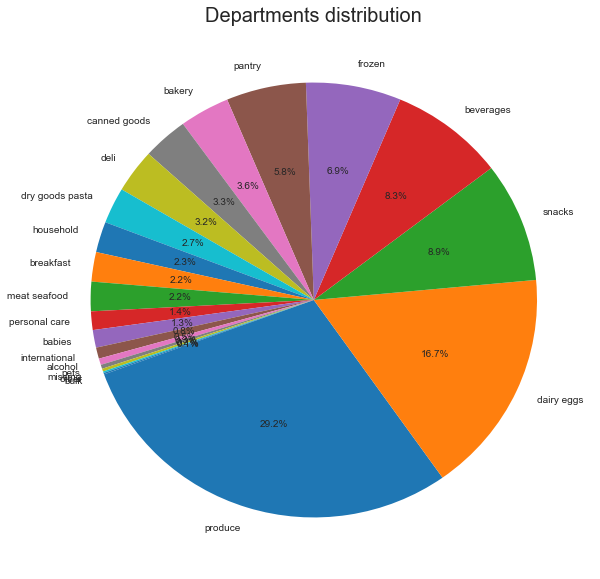

In [20]:
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=20)

plt.show()

### Reorder Percentage for Department

Now, we have analyzed the dataset and the features it provided within the dataset. For latter prediction on whether the user will reorder the product or not, we need to consider and investigate on the reordering percentage at different department.

In [21]:
grouped_df = order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()

In [22]:
grouped_df.sort_values(by=['reordered'], ascending=False, inplace=True)
grouped_df.head()

,department,reordered
7,dairy eggs,0.669969
3,beverages,0.653460
19,produce,0.649913
2,bakery,0.628141
8,deli,0.607719


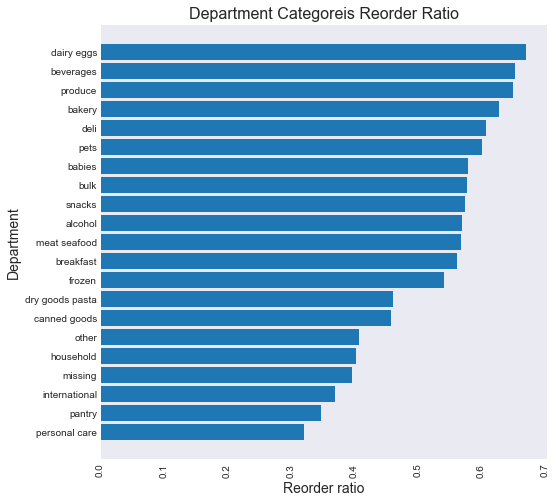

In [23]:
plt.figure(figsize=(8,8))
plt.barh(grouped_df['department'], grouped_df['reordered'])
plt.xlabel('Reorder ratio', fontsize=14)
plt.ylabel('Department', fontsize=14)
plt.title("Department Categoreis Reorder Ratio", fontsize=16)
plt.xticks(rotation='vertical')
plt.gca().invert_yaxis()
plt.show()

### The relationship between the order for product added to cart and reorder ratio

From the trends showed in the figure below, we can tell that the earlier the user add the product into the cart, the more likely the customer will reorder this product. We can find a decreasing trend and the negative correlation between these two factors.

In [24]:
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df["add_to_cart_order_mod"].ix[order_products_prior_df["add_to_cart_order_mod"]>40] = 40
grouped_df = order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


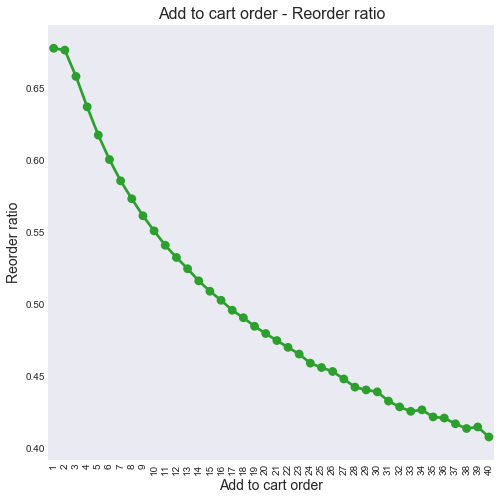

In [25]:
plt.figure(figsize=(8,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=14)
plt.xlabel('Add to cart order', fontsize=14)
plt.title("Add to cart order - Reorder ratio", fontsize=16)
plt.xticks(rotation='vertical')
plt.show()